# Discogs Analysis


[Discogs Developer](https://www.discogs.com/developers/#page:home,header:home-quickstart)

[Download Discogs Data](https://data.discogs.com/)

[Discogs Database Search](https://www.discogs.com/developers/#page:database,header:database-search)

[Discogs Oauth](https://github.com/jesseward/discogs-oauth-example)

Need data on location of purchase

### Key Questions to answer:

* What is the profile of my record collection?

* What are the most expensive records and CDs I own?

* Which band/artist do I own the most and what is the cost of that?

* Which record label do I support the most and which did I spent the most?

* Which subgenre costs the most and which one is worth the most?

* Is there a difference between autographed and non-authographed records?

* What is the breakdown of the format and the cost, min price, median price, and max price?

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas_profiling
import seaborn as sns
#import cufflinks as cf
import plotly.offline
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)
from pylab import rcParams
sns.set(rc={'figure.figsize':(10,6)})
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [217]:
discogs_df = pd.read_csv('../data/discogs_data.csv')
discogs_df.head(10)

ID         Catalog#                    Artist                   Artist2  \
0   33          SD 8283                       Yes                       Yes   
1  165        RR 6583-1                  Mastodon                  Mastodon   
2  373          CS 8192  The Dave Brubeck Quartet  The Dave Brubeck Quartet   
3  142         SD 3-100                       Yes                       Yes   
4   18         SD 2-908                       Yes                       Yes   
5  340         SD 18122                       Yes                       Yes   
6  374          SD 8245              King Crimson              King Crimson   
7  255  34224, PZ 34224                Kansas (2)                Kansas (2)   
8  341         SD 19132                       Yes                       Yes   
9   19        AFL1-3516                 Scorpions                 Scorpions   

                                               Title               Label  \
0                                      The Yes Album            Atlantic   
1                                          Remission     Relapse Records   
2                                           Time Out            Columbia   
3                                           Yessongs            Atlantic   
4                      Tales From Topographic Oceans            Atlantic   
5                                            Relayer            Atlantic   
6  In The Court Of The Crimson King  An Observati...            Atlantic   
7                                       Leftoverture  Kirshner, Kirshner   
8                                            Fragile            Atlantic   
9                                  Best Of Scorpions          RCA Victor   

                     Format  Rating  Released  release_id CollectionFolder  \
0        LP, Album, RE, PR;     NaN      1971   7116823.0            Vinyl   
1  2x12", Album, RE, RM, RP     NaN      2017   8863478.0            Vinyl   
2                 LP, Album     NaN      1961   2676016.0            Vinyl   
3               3xLP, Album     5.0      1973   8179158.0            Vinyl   
4          2xLP, Album, Gat     NaN      1973   8535940.0            Vinyl   
5            LP, Album, Gat     NaN      1974    755646.0            Vinyl   
6        LP, Album, RE, PRC     NaN      1975   4254321.0            Vinyl   
7                 LP, Album     3.0      1976   1476710.0            Vinyl   
8        LP, Album, RE, SRC     NaN      1977   2637700.0            Vinyl   
9                  LP, Comp     NaN      1979   3632339.0            Vinyl   

      Date Added Collection Media Condition Collection Sleeve Condition  \
0  7/21/19 20:21                        NaN                         NaN   
1  12/3/16 11:44                        NaN                         NaN   
2   5/5/14 21:16                        NaN                         NaN   
3  4/20/17 19:05                        NaN                         NaN   
4  2/22/20 15:50                        NaN                         NaN   
5   9/6/14 11:59                        NaN                         NaN   
6   5/5/14 21:14                        NaN                         NaN   
7   8/9/15 18:25                        NaN                         NaN   
8   9/6/14 11:59                        NaN                         NaN   
9  2/22/20 15:47                        NaN                         NaN   

  Collection Notes  Collection Cost Collection Autographed   Min    Median   \
0              NaN             5.50                    NaN   2.25      3.87   
1              NaN            15.00                    NaN   7.99     21.67   
2              NaN            20.00                    NaN   5.07     26.50   
3              NaN             5.00                    NaN   3.95      9.99   
4              NaN             5.50                    NaN   7.99     13.49   
5              NaN             4.00                    NaN   1.13      7.00   
6              NaN            12.00                    NaN 

Some of the labels are separated by commas.

In [218]:
discogs_df = pd.concat([discogs_df, discogs_df['Label'].str.split(', ', expand=True)], axis=1)
discogs_df.head(20)

ID                         Catalog#                     Artist  \
0    33                          SD 8283                        Yes   
1   165                        RR 6583-1                   Mastodon   
2   373                          CS 8192   The Dave Brubeck Quartet   
3   142                         SD 3-100                        Yes   
4    18                         SD 2-908                        Yes   
5   340                         SD 18122                        Yes   
6   374                          SD 8245               King Crimson   
7   255                  34224, PZ 34224                 Kansas (2)   
8   341                         SD 19132                        Yes   
9    19                        AFL1-3516                  Scorpions   
10  143               MCA 1688, MCA-1688                 Steely Dan   
11   17                         SD 16019                        Yes   
12  149  422-811 492-1 M-1, 811492-1 M-1                    Various   
13  256                        GHS 24099                 Whitesnake   
14  275                        RR 6427-2  The Dillinger Escape Plan   
15  182                         HH666-52                    Cave In   
16  375                           IPC-32                   Isis (6)   
17  193                     J1PV-55425-1                Wyclef Jean   
18  146                          TZ 7092                   Kayo Dot   
19  264                         EK 93480               Chevelle (2)   

                      Artist2  \
0                         Yes   
1                    Mastodon   
2    The Dave Brubeck Quartet   
3                         Yes   
4                         Yes   
5                         Yes   
6                King Crimson   
7                  Kansas (2)   
8                         Yes   
9                   Scorpions   
10                 Steely Dan   
11                        Yes   
12                    Various   
13                 Whitesnake   
14  The Dillinger Escape Plan   
15                    Cave In   
16                   Isis (6)   
17                Wyclef Jean   
18                   Kayo Dot   
19               Chevelle (2)   

                                                Title  \
0                                       The Yes Album   
1                                           Remission   
2                                            Time Out   
3                                            Yessongs   
4                       Tales From Topographic Oceans   
5                                             Relayer   
6   In The Court Of The Crimson King  An Observati...   
7                                        Leftoverture   
8                                             Fragile   
9                                   Best Of Scorpions   
10                                                Aja   
11                                              Drama   
12  Flashdance (Original Soundtrack From The Motio...   
13                                         Whitesnake   
14                               Calculating Infinity   
15                                            Jupiter   
16                                            Oceanic   
17                                 The Preacher's Son   
18                                  Choirs Of The Eye   
19             This Type Of Thinking (Could Do Us In)   

                       Label                    Format  Rating  Released  \
0                   Atlantic        LP, Album, RE, PR;     NaN      1971   
1            Relapse Records  2x12", Album, RE, RM, RP     NaN      2017   
2                   Columbia                 LP, Album     NaN      1961   
3                   Atlantic               3xLP, Album     5.0      1973   
4                   Atlantic          2xLP, Album, Gat     NaN      1973   
5                   Atlantic            LP, Album, Gat     NaN      1974   
6                   Atlantic        LP, Album, RE, PRC     NaN      1975   
7         Kir

Rename columns

In [221]:
discogs_df.rename(columns={0:'Label1',1:'Label2',2:'Label3',3:'Label4'}, inplace=True)
discogs_df.head()

ID   Catalog#                    Artist                   Artist2  \
0   33    SD 8283                       Yes                       Yes   
1  165  RR 6583-1                  Mastodon                  Mastodon   
2  373    CS 8192  The Dave Brubeck Quartet  The Dave Brubeck Quartet   
3  142   SD 3-100                       Yes                       Yes   
4   18   SD 2-908                       Yes                       Yes   

                           Title            Label                    Format  \
0                  The Yes Album         Atlantic        LP, Album, RE, PR;   
1                      Remission  Relapse Records  2x12", Album, RE, RM, RP   
2                       Time Out         Columbia                 LP, Album   
3                       Yessongs         Atlantic               3xLP, Album   
4  Tales From Topographic Oceans         Atlantic          2xLP, Album, Gat   

   Released  release_id CollectionFolder     Date Added  Collection Cost  \
0      1971   7116823.0            Vinyl  7/21/19 20:21              5.5   
1      2017   8863478.0            Vinyl  12/3/16 11:44             15.0   
2      1961   2676016.0            Vinyl   5/5/14 21:16             20.0   
3      1973   8179158.0            Vinyl  4/20/17 19:05              5.0   
4      1973   8535940.0            Vinyl  2/22/20 15:50              5.5   

  Collection Autographed   Min    Median     Max   Genre          Subgenre  \
0                    NaN   2.25      3.87   10.00   Rock  Progressive Rock   
1                    NaN   7.99     21.67   30.19  Metal      Sludge Metal   
2                    NaN   5.07     26.50  130.00   Jazz              Jazz   
3                    NaN   3.95      9.99   20.00   Rock  Progressive Rock   
4                    NaN   7.99     13.49   20.00   Rock  Progressive Rock   

            Label1 Label2 Label3 Label4  
0         Atlantic   None   None   None  
1  Relapse Records   None   None   None  
2         Columbia   None   None   None  
3         Atlantic   None   None   None  
4         Atlantic   None   None   None

Export for inspection

In [226]:
discogs_df.to_csv('../output/discogs_clean_data.csv',index=False)

## Label Sorting

Label must be sorted. There is an issue like this where Svart Records is placed before 20 Buck Spin

In [252]:
twentybuck = discogs_df[discogs_df['Label'].str.contains("20 Buck Spin")]
twentybuck

ID            Catalog#                 Artist                Artist2  \
154   88             SPIN065  Mournful Congregation  Mournful Congregation   
215  156             SPIN075                Khemmis                Khemmis   
239  213             SPIN048             Pallbearer             Pallbearer   
259  157             SPIN076                Khemmis                Khemmis   
283   14  SVART003, SPIN 080         Oranssi Pazuzu         Oranssi Pazuzu   
285  133             SPIN072              Obsequiae              Obsequiae   
311   91             SPIN091              Acephalix              Acephalix   
322   71     SVR226, SPIN059         Oranssi Pazuzu         Oranssi Pazuzu   
346   73             SPIN093          Spirit Adrift          Spirit Adrift   
350   79    SPIN081, OPLP338  Mournful Congregation  Mournful Congregation   
355   53    SPIN045, OPLP264  Mournful Congregation  Mournful Congregation   
369   74           SPIN101LP              Tomb Mold              Tomb Mold   
388   36             SPIN112          Immortal Bird          Immortal Bird   
402   10             SPIN114              Tomb Mold              Tomb Mold   

                          Title                             Label  \
154  Concrescence Of The Sophia                      20 Buck Spin   
215                  Absolution                      20 Buck Spin   
239       Sorrow And Extinction                      20 Buck Spin   
259                      Hunted                      20 Buck Spin   
283              V√§r√§htelij√§       Svart Records, 20 Buck Spin   
285        Aria Of Vernal Tombs                      20 Buck Spin   
311                  Decreation                      20 Buck Spin   
322                   Valonielu       Svart Records, 20 Buck Spin   
346         Curse Of Conception                      20 Buck Spin   
350        The Incubus Of Karma  20 Buck Spin, Osmose Productions   
355           The Book Of Kings  20 Buck Spin, Osmose Productions   
369     Manor Of Infinite Forms                      20 Buck Spin   
388           Thrive On Neglect                      20 Buck Spin   
402      Planetary Clairvoyance                      20 Buck Spin   

                   Format  Released  release_id CollectionFolder  \
154         LP, MiniAlbum      2014   5807031.0            Vinyl   
215         LP, Album, RP      2015   8551023.0            Vinyl   
239  2xLP, Album, RP, Blu      2015   6825240.0            Vinyl   
259             LP, Album      2016   9222656.0            Vinyl   
283        2xLP, Ltd, Blu      2016  11636087.0            Vinyl   
285        LP, Album, Cle      2016   8556349.0            Vinyl   
311             LP, Album      2017  10946608.0            Vinyl   
322         LP, Album, RE      2017  10341101.0            Vinyl   
346        LP, Album, Oli      2018  12305606.0            Vinyl   
350      2xLP, Album, Ltd      2018  11750808.0            Vinyl   
355       2xLP, Album, RP      2018  13018313.0            Vinyl   
369   LP, Album, Ltd, Ora      2018  12090041.0            Vinyl   
388        LP, Album, Ltd      2019  13835380.0            Vinyl   
402   LP, Album, Ltd, Sil      2019  13909660.0            Vinyl   

         Date Added  Collection Cost Collection Autographed   Min    Median   \
154    6/3/18 15:21             17.0                    NaN   6.00      9.00   
215   1/18/17 15:05             18.0                    Yes  10.00     19.49   
239   2/26/16 11:05             15.0                    NaN  20.00     29.43   
259   1/18/17 15:05             18.0                    Yes  10.00     15.00   
283   2/22/20 15:59             25.0                    NaN  20.00     24.17   
285   4/27/17 18:58             15.0                    NaN  20.78     28.50   
311   5/29/18 18:20             15.0                    NaN  11.90     18.50   
322  12/18/18 14:36             15.0                    NaN  18.71     22.06   
346  12/18/18 12:39             15.0                    Na

In [236]:
discogs_df['Label'][discogs_df['Artist'] == 'Oranssi Pazuzu']

283    Svart Records, 20 Buck Spin
322    Svart Records, 20 Buck Spin
393               Roadburn Records
Name: Label, dtype: object

In [245]:
list = ['Svart Records', '20 Buck Spin']
list

['Svart Records', '20 Buck Spin']

Sort like this

In [246]:
list.sort()
list

['20 Buck Spin', 'Svart Records']

In [249]:
l = [[0, 1, 'f'], [4, 2, 't'], [9, 4, 'afsd']]
l.sort(key=lambda x: x[0])
l

[[0, 1, 'f'], [4, 2, 't'], [9, 4, 'afsd']]

### [Sort lists in a Pandas Dataframe column](https://stackoverflow.com/questions/39900061/sort-lists-in-a-pandas-dataframe-column)

In [280]:
result = twentybuck.Label.apply(lambda x: sorted(x))
#result = DataFrame(result).reset_index(drop=True)
result

154                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
215                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
239                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
259                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
283    [ ,  ,  ,  , ,, 0, 2, B, R, S, S, a, c, c, d, ...
285                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
311                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
322    [ ,  ,  ,  , ,, 0, 2, B, R, S, S, a, c, c, d, ...
346                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
350    [ ,  ,  ,  , ,, 0, 2, B, O, P, S, c, c, d, e, ...
355    [ ,  ,  ,  , ,, 0, 2, B, O, P, S, c, c, d, e, ...
369                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
388                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
402                 [ ,  , 0, 2, B, S, c, i, k, n, p, u]
Name: Label, dtype: object

Drop column

In [220]:
# Drop columns
discogs_df = discogs_df.drop(columns=['Rating','Collection Media Condition', 
                                      'Collection Notes','Collection Sleeve Condition'])

In [213]:
discogs_df['Collection Autographed'] = discogs_df['Collection Autographed'].fillna('No')

## Create new columns:

* Artist - Label  
* pct_profit_min  
* pct_profit_median  
* pct_profit_max  

In [214]:
discogs_df['Record'] = discogs_df['Artist'] + ' - ' + discogs_df['Title']
discogs_df[['Artist','Label','Record']].head()

Artist            Label  \
0                       Yes         Atlantic   
1                  Mastodon  Relapse Records   
2  The Dave Brubeck Quartet         Columbia   
3                       Yes         Atlantic   
4                       Yes         Atlantic   

                                Record  
0                  Yes - The Yes Album  
1                 Mastodon - Remission  
2  The Dave Brubeck Quartet - Time Out  
3                       Yes - Yessongs  
4  Yes - Tales From Topographic Oceans

Run Pandas Profiler

In [144]:
profile = discogs_df.profile_report(title='Discogs Data Profiling Report',correlations={"cramers": False})

In [145]:
profile

Here are some interesting information about my record collection: 

1) I purchased around 408 albums in vinyl, CD, and tape format.  
2) I have 188 unique artists in my collection. I also have 10 artists that collaborated with others.  
3) My top five bands are:

|        Artist2              |   Count   |  Percentage  |
|:---------------------------:|:---------:|:------------:|
|  Opeth	                  |    19	  |      4.7%	 |
|  Cult Of Luna	              |    16	  |      3.9%	 |
|  Isis (6)	                  |    12	  |      2.9%	 |
|  Panopticon (6)	          |    11	  |      2.7%	 |
|  Between The Buried And Me  |    10	  |      2.5%	 |

4) I own 388 distinct albums.   
5) In my collection, 84.3% are vinyl and 15.4\% are CD. I have 2 Tapes.

6) My top 5 genres are:     

|  Genre       |  Count  |  Percentage  |
|:------------:|:-------:|:------------:|
|  Metal	   |   358	 |     87.7%    |	 
|  Rock	       |   31	 |     7.6%	    | 
|  Electronic  |   12	 |     2.9%	    | 
|  Pop	       |   3	 |     0.7%	    | 
|  Hip Hop	   |   2	 |     0.5%	    |

7) My top 5 subgenres are:  

|       Genre          |  Count  |  Percentage  |
|:--------------------:|:-------:|:------------:|
|  Black Metal	       |    83	 |     20.3%    | 
|  Progressive Metal   |    62	 |     15.2%    | 
|  Post Metal	       |    61	 |     15.0%    | 
|  Djent	           |    26	 |     6.4%	    |
|  Sludge Metal	       |    26	 |     6.4%	    |


7) I typically pay \\$15 (50 or 12.3\%) for a record. The next is \\$20 (49 or 12.0\%).     
8) The most frequent album sold at the `_Max_` price is \\$29.99 (12 or 2.9\%). Next is \\$39.99 (9 or 2.2\%).

9) My top five record labels are:  

|        Label         |  Count  |  Percentage  |
|:--------------------:|:-------:|:------------:|
|  Relapse Records	   |    23	 |      5.6%	| 
|  Century Media	   |    17	 |      4.2%	| 
|  Prosthetic Records  |    13	 |      3.2%	| 
|  Hydra Head Records  |    12	 |      2.9%	| 
|  20 Buck Spin	       |    10	 |      2.5%	|

10) Most albums I buy were released in the last several years: 

|  Year  |  Count  |  Percentage  |
|:------:|:-------:|:------------:|
|  2014	 |   61	   |     15.0%    |	 
|  2013	 |   55	   |     13.5%    |	 
|  2016	 |   52	   |     12.7%    |	 
|  2015	 |   48	   |     11.8%    |
|  2017	 |   40	   |     9.8%     |

Get summary statistics

In [146]:
discogs_df.describe()

ID     Released    release_id  Collection_Cost       _Min_  \
count  408.000000   408.000000  4.070000e+02       408.000000  392.000000   
mean   204.504902  2013.164216  7.330329e+06        18.528627   17.322449   
std    117.932184     7.567225  3.417850e+06        14.222461   22.008193   
min      1.000000  1961.000000  3.764730e+05         0.000000    0.860000   
25%    102.750000  2013.000000  4.823426e+06        12.000000    8.000000   
50%    204.500000  2015.000000  6.820328e+06        17.000000   14.980000   
75%    306.250000  2017.000000  9.817652e+06        23.000000   21.210000   
max    409.000000  2020.000000  1.473373e+07       232.000000  389.000000   

         _Median_       _Max_  
count  392.000000  392.000000  
mean    25.659311   38.255561  
std     29.396237   47.702644  
min      2.250000    2.990000  
25%     14.037500   20.000000  
50%     21.990000   29.260000  
75%     29.862500   40.000000  
max    514.170000  799.990000

Run correlation

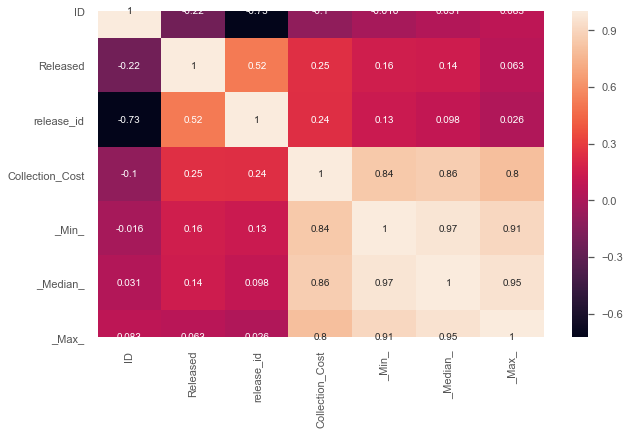

In [190]:
corrMatrix = discogs_df.corr()
sns.heatmap(corrMatrix, annot=True)

## Plot boxplot of the collection cost, minimum sold, median sold, and max sold.

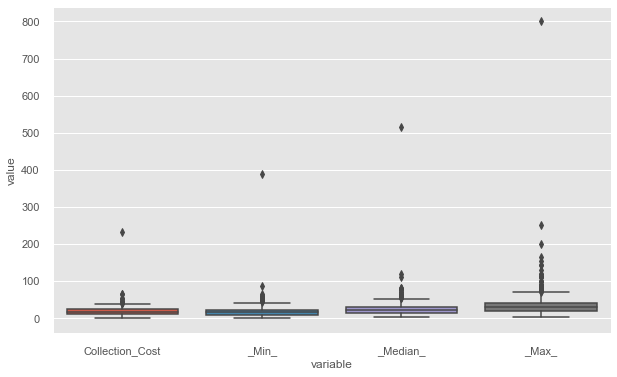

In [191]:
sns.boxplot(x="variable", y="value", data=pd.melt(discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']]))

Remove outlier

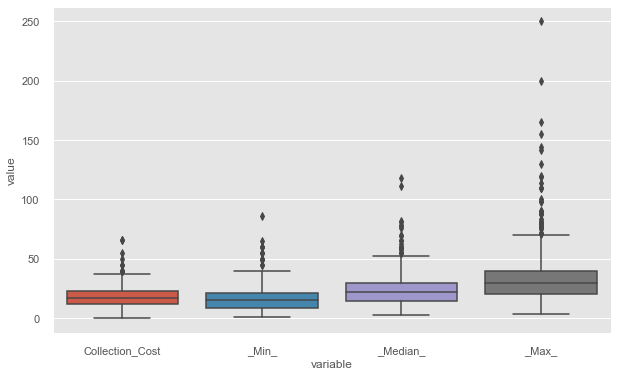

In [192]:
sns.boxplot(x="variable", y="value", data=pd.melt(discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']][discogs_df.Collection_Cost < discogs_df['Collection_Cost'].max()]))

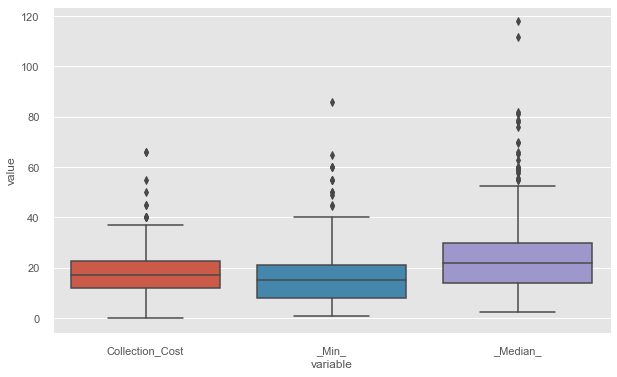

In [193]:
sns.boxplot(x="variable", y="value", data=pd.melt(discogs_df[['Collection_Cost','_Min_','_Median_']][discogs_df.Collection_Cost < discogs_df['Collection_Cost'].max()]))

In [194]:
discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']].sum().reset_index()

index         0
0  Collection_Cost   7559.68
1            _Min_   6790.40
2         _Median_  10058.45
3            _Max_  14996.18

In [95]:
print('I spent $', discogs_df['Collection_Cost'].sum(),' on music that is recorded on Discogs. \n \nMy collection is worth $',discogs_df['_Median_'].sum())

I spent $ 7559.679999999999  on music that is recorded on Discogs. 
 
My collection is worth $ 10058.45


In [96]:
discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']].mean().reset_index()

index          0
0  Collection_Cost  18.528627
1            _Min_  17.322449
2         _Median_  25.659311
3            _Max_  38.255561

In [97]:
print('I spent on averege $', discogs_df['Collection_Cost'].mean().round(2),' on per album that is recorded on Discogs. \n \nMy average collection is worth $',discogs_df['_Median_'].mean().round(2))

I spent on averege $ 18.53  on per album that is recorded on Discogs. 
 
My average collection is worth $ 25.66


## What is the most expensive record I bought?

In [98]:
max_cost = discogs_df[discogs_df['Collection_Cost']==discogs_df['Collection_Cost'].max()]
max_cost

ID           Catalog#     Artist    Artist2  \
302  187  NB 3446-5, 3446-5  Meshuggah  Meshuggah   

                            Title                         Label  \
302  25 Years Of Musical Deviance  Nuclear Blast, Nuclear Blast   

                                                Format  Released  release_id  \
302  Box, Comp, Ltd + 12", EP, RE, Cle + 2xLP, Albu...      2016   8808750.0   

    CollectionFolder     Date_Added  Collection_Cost Collection_Autographed  \
302            Vinyl  7/28/16 20:17            232.0                     No   

     _Min_  _Median_   _Max_  Genre Subgenre  \
302  389.0    514.17  799.99  Metal    Djent   

                                       Record  
302  Meshuggah - 25 Years Of Musical Deviance

In [99]:
max_cost[['Artist','Title','Format','Collection_Cost','_Median_','Genre','Subgenre']]

Artist                         Title  \
302  Meshuggah  25 Years Of Musical Deviance   

                                                Format  Collection_Cost  \
302  Box, Comp, Ltd + 12", EP, RE, Cle + 2xLP, Albu...            232.0   

     _Median_  Genre Subgenre  
302    514.17  Metal    Djent

In [100]:
print('This record has 7 full length albums and 3 EPs plus a DVD and a lyric book')

This record has 7 full length albums and 3 EPs plus a DVD and a lyric book


The most expensive record I own is the Meshuggah - 25 Years Of Musical Deviance, Boxset.

## What is the least expensive record I own?

In [101]:
min_cost = discogs_df[discogs_df['Collection_Cost']==discogs_df['Collection_Cost'].min()]
min_cost

ID   Catalog#               Artist              Artist2     Title  \
87  189  Relic 009  Bunrage / Footpaths  Bunrage / Footpaths  Untitled   

          Label   Format  Released  release_id CollectionFolder  \
87  Haute Magie  LP, Cle      2012   3469073.0            Vinyl   

       Date_Added  Collection_Cost Collection_Autographed  _Min_  _Median_  \
87  6/18/16 13:22              0.0                     No    NaN       NaN   

    _Max_ Genre Subgenre                          Record  
87    NaN  Folk     Folk  Bunrage / Footpaths - Untitled

In [102]:
min_cost[['Artist','Title','Format','Collection_Cost','_Median_','Genre','Subgenre']]

Artist     Title   Format  Collection_Cost  _Median_ Genre  \
87  Bunrage / Footpaths  Untitled  LP, Cle              0.0       NaN  Folk   

   Subgenre  
87     Folk

In [103]:
print('I got this record for free from a friend')

I got this record for free from a friend


## What is the least expensive record I bought?

In [104]:
purchased_df = discogs_df[discogs_df.Collection_Cost > 0]
min_purchase = purchased_df[purchased_df['Collection_Cost']==purchased_df['Collection_Cost'].min()]
min_purchase[['Artist','Title','Format','Collection_Cost','_Median_','Genre','Subgenre']]

Artist               Title       Format  Collection_Cost  _Median_  \
13   Whitesnake          Whitesnake    LP, Album              0.5      9.05   
17  Wyclef Jean  The Preacher's Son  2xLP, Promo              0.5      3.88   

      Genre      Subgenre  
13     Rock  Classic Rock  
17  Hip Hop       Hip Hop

I bought Wyclef Jean 2xLP at the basement of Dusty Groove for 50 cents.

## What are the top 10 bands with the most expensive records purchased?

In [105]:
record_sum   = discogs_df.groupby(['Artist2']).agg({
                       'Title': 'count',
                       'Label': 'nunique',
                       'Collection_Cost': 'sum',
                       '_Min_': 'sum',
                       '_Median_': 'sum',
                       '_Max_': 'sum'
                        }).reset_index().sort_values(by='_Median_',ascending=False)

## Plot top 10 bands that I purchased the most by cost

Artist2  Title  Label  Collection_Cost   _Min_  \
35                Cult Of Luna     16      7           552.75  390.58   
105                      Opeth     19     13           533.00  419.55   
88                   Meshuggah      2      1           260.00  403.00   
111             Panopticon (6)     11      4           238.25  205.87   
73                    Isis (6)     12      4           217.00  214.61   
38            Deathspell Omega      9      3           190.00  152.34   
87                    Mastodon      9      5           177.00  124.95   
15   Between The Buried And Me     10      2           157.50  234.89   
155                   Thou (2)      9      9           137.00  123.96   
112                Perturbator      5      2           130.00  116.89   

     _Median_    _Max_  
35     576.84   795.90  
105    660.02  1013.97  
88     546.67   839.98  
111    285.85   406.34  
73     317.39   492.03  
38     215.67   355.69  
87     236.89   409.37  
15     333.08   544.67  
155    180.03   246.03  
112    178.00   261.04

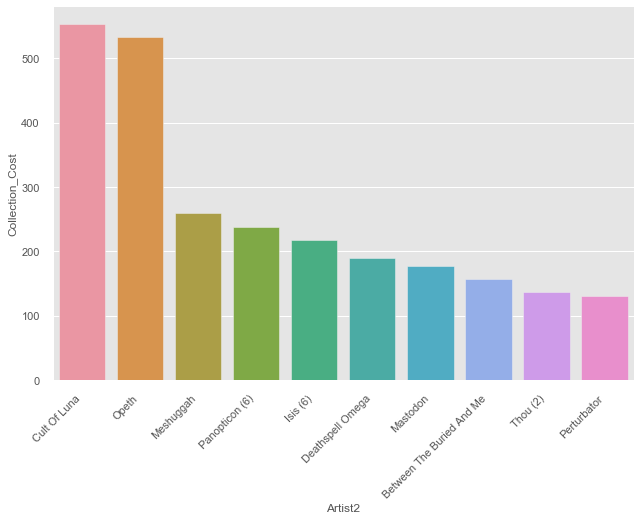

In [160]:
chart = sns.catplot(x="Artist2", y="Collection_Cost", kind="bar", 
                    data=record_sum.sort_values('Collection_Cost',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
record_sum.sort_values('Collection_Cost',ascending=False).head(10)

## What the most records purchased by the Top 10 bands?

Artist2  Title  Label  Collection_Cost   _Min_  \
105                      Opeth     19     13           533.00  419.55   
35                Cult Of Luna     16      7           552.75  390.58   
73                    Isis (6)     12      4           217.00  214.61   
111             Panopticon (6)     11      4           238.25  205.87   
15   Between The Buried And Me     10      2           157.50  234.89   
87                    Mastodon      9      5           177.00  124.95   
38            Deathspell Omega      9      3           190.00  152.34   
155                   Thou (2)      9      9           137.00  123.96   
80                    Krallice      6      2           126.00   93.87   
186                        Yes      6      1            28.00   21.82   

     _Median_    _Max_  
105    660.02  1013.97  
35     576.84   795.90  
73     317.39   492.03  
111    285.85   406.34  
15     333.08   544.67  
87     236.89   409.37  
38     215.67   355.69  
155    180.03   246.03  
80     135.20   143.58  
186     46.15   105.74

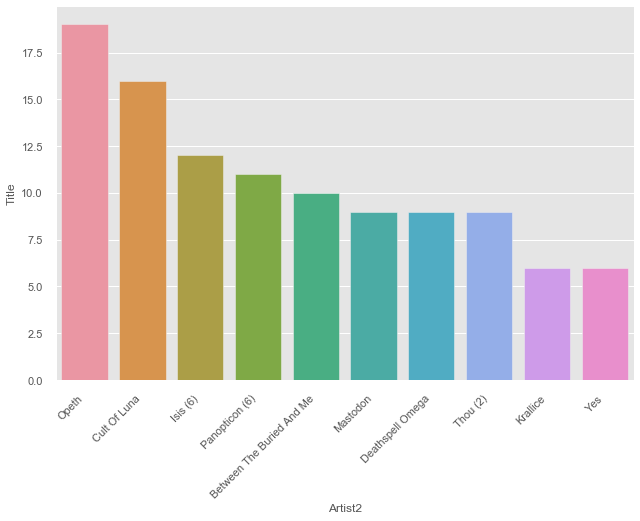

In [161]:
chart = sns.catplot(x="Artist2", y="Title", kind="bar", 
                    data=record_sum.sort_values('Title',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

record_sum.sort_values('Title',ascending=False).head(10)

## What are the top 10 most valuable record by min?

Artist2                                     Title  \
302                  Meshuggah              25 Years Of Musical Deviance   
54                       Opeth  In Live Concert At The Royal Albert Hall   
142                  Haken (2)                              The Mountain   
86   Between The Buried And Me          The Parallax II: Future Sequence   
341            Yellow Eyes (2)                  Immersion Trench Reverie   
340                   Isis (6)                       Live VII - 02.25.10   
141                      Opeth                                  Heritage   
140  Between The Buried And Me                            The Anatomy Of   
139                    Leprous                                      Coal   
202                    Leprous                                 Bilateral   

     Collection_Cost   _Min_  _Median_   _Max_  
302            232.0  389.00    514.17  799.99  
54              66.0   85.99    117.83  141.76  
142             22.0   64.84     81.20  109.88  
86              30.0   60.00     70.00  113.64  
341             15.0   60.00     69.50   79.00  
340             18.0   60.00     65.96   90.00  
141             40.0   54.95     75.92  100.00  
140             21.0   54.95     78.50  165.00  
139             20.0   54.93     59.44   87.91  
202             40.0   50.00    111.52  155.02

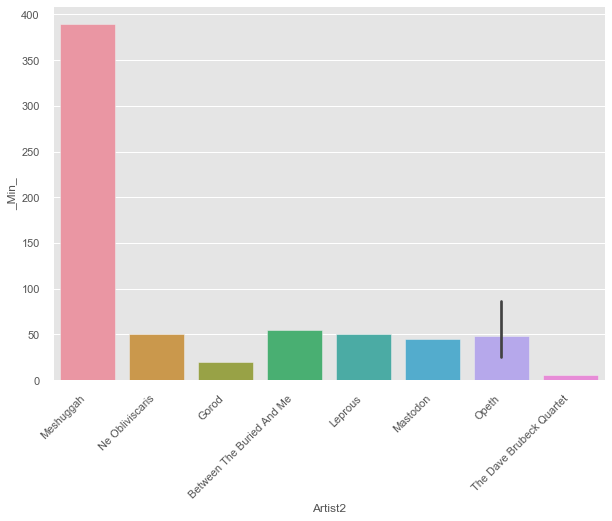

In [162]:
chart = sns.catplot(x="Artist2", y="_Min_", kind="bar", 
                    data=discogs_df.sort_values('_Max_',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

discogs_df[['Artist2','Title','Collection_Cost',
            '_Min_','_Median_','_Max_']].sort_values('_Min_',ascending=False).head(10)

## What are the top 10 most valuable record by median?

Artist2                                     Title  \
302                  Meshuggah              25 Years Of Musical Deviance   
54                       Opeth  In Live Concert At The Royal Albert Hall   
202                    Leprous                                 Bilateral   
201                   Mastodon                                 Remission   
142                  Haken (2)                              The Mountain   
140  Between The Buried And Me                            The Anatomy Of   
203            Ne Obliviscaris                               Portal Of I   
141                      Opeth                                  Heritage   
86   Between The Buried And Me          The Parallax II: Future Sequence   
341            Yellow Eyes (2)                  Immersion Trench Reverie   

              Subgenre  Collection_Cost   _Min_  _Median_   _Max_  
302              Djent            232.0  389.00    514.17  799.99  
54   Progressive Metal             66.0   85.99    117.83  141.76  
202  Progressive Metal             40.0   50.00    111.52  155.02  
201       Sludge Metal             55.0   45.00     81.97  143.90  
142  Progressive Metal             22.0   64.84     81.20  109.88  
140  Progressive Metal             21.0   54.95     78.50  165.00  
203  Progressive Metal             30.0   50.00     77.81  250.00  
141  Progressive Metal             40.0   54.95     75.92  100.00  
86   Progressive Metal             30.0   60.00     70.00  113.64  
341        Black Metal             15.0   60.00     69.50   79.00

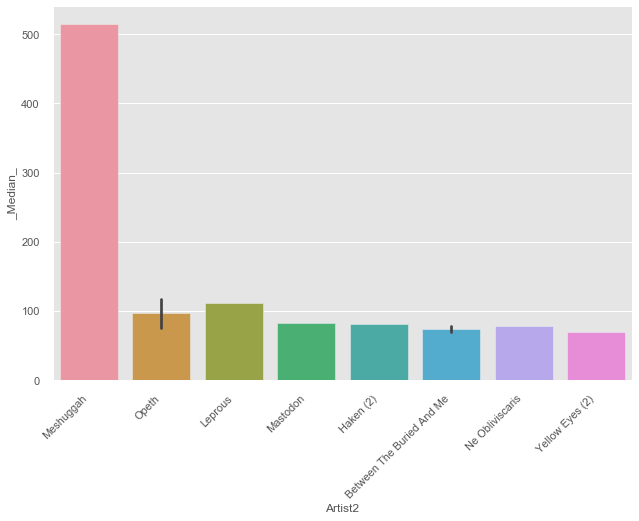

In [163]:
chart = sns.catplot(x="Artist2", y="_Median_", kind="bar", 
                    data=discogs_df.sort_values('_Median_',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

discogs_df[['Artist2','Title','Subgenre','Collection_Cost',
            '_Min_','_Median_','_Max_']].sort_values('_Median_',ascending=False).head(10)

## What are the top 10 most valuable record by max?

Artist2                                     Title  \
302                  Meshuggah              25 Years Of Musical Deviance   
203            Ne Obliviscaris                               Portal Of I   
81                       Gorod                      A Perfect Absolution   
140  Between The Buried And Me                            The Anatomy Of   
202                    Leprous                                 Bilateral   
201                   Mastodon                                 Remission   
54                       Opeth  In Live Concert At The Royal Albert Hall   
2     The Dave Brubeck Quartet                                  Time Out   
248                      Opeth                   Deliverance & Damnation   
194                      Opeth                                 Watershed   

     Collection_Cost   _Min_  _Median_   _Max_  
302            232.0  389.00    514.17  799.99  
203             30.0   50.00     77.81  250.00  
81              12.0   19.99     48.05  199.98  
140             21.0   54.95     78.50  165.00  
202             40.0   50.00    111.52  155.02  
201             55.0   45.00     81.97  143.90  
54              66.0   85.99    117.83  141.76  
2               20.0    5.07     26.50  130.00  
248             36.0   33.03     58.44  119.99  
194             30.0   25.00     55.00  119.00

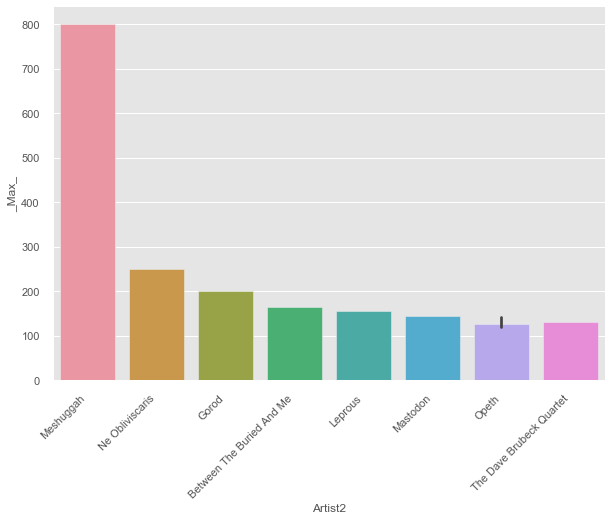

In [170]:
chart = sns.catplot(x="Artist2", y="_Max_", kind="bar", 
                    data=discogs_df.sort_values('_Max_',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

discogs_df[['Artist2','Title','Collection_Cost',
            '_Min_','_Median_','_Max_']].sort_values('_Max_',ascending=False).head(10)

The Meshuggah boxset was sold for 514.17 and I bought it for 232.

## What are the Top 10 albums sold by average?

In [110]:
record_mean   = discogs_df.groupby(['Artist2']).agg({
                       'Title': 'count',
                       'Label': 'nunique',
                       'Collection_Cost': 'mean',
                       '_Min_': 'mean',
                       '_Median_': 'mean',
                       '_Max_': 'mean'
                        }).reset_index().sort_values(by='_Median_',ascending=False)

Artist2  Title  Label  Collection_Cost       _Min_  \
88               Meshuggah      2      1       130.000000  201.500000   
83                 Leprous      3      2        28.000000   42.586667   
96         Ne Obliviscaris      2      2        25.000000   37.000000   
150  The Contortionist (2)      4      3        20.625000   30.247500   
3         Altar Of Plagues      1      1        36.500000   40.000000   
56              Gojira (2)      1      1        30.000000   33.000000   
185        Yellow Eyes (2)      2      1        16.500000   41.995000   
31             Cloudkicker      1      1        15.000000   30.000000   
171             Vildhjarta      2      2        17.500000   25.495000   
12                Baroness      3      2        17.543333   29.680000   

       _Median_       _Max_  
88   273.335000  419.990000  
83    67.493333   95.106667  
96    54.520000  144.230000  
150   54.057500   68.232500  
3     49.990000   82.050000  
56    48.490000   65.000000  
185   47.075000   52.495000  
31    46.980000   55.000000  
171   46.385000   59.990000  
12    45.973333   66.583333

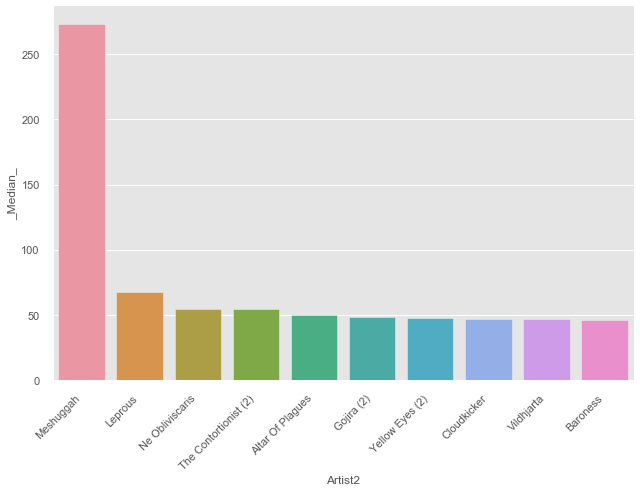

In [172]:
chart = sns.catplot(x="Artist2", y="_Median_", kind="bar", 
                    data=record_mean.sort_values('_Median_',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
record_mean.sort_values('_Median_',ascending=False).head(10)

## What are the Top 10 albums sold by max?

Artist2  Title  Label  Collection_Cost       _Min_  \
88                  Meshuggah      2      1          130.000  201.500000   
96            Ne Obliviscaris      2      2           25.000   37.000000   
151  The Dave Brubeck Quartet      1      1           20.000    5.070000   
58                      Gorod      2      1           14.000   15.995000   
83                    Leprous      3      2           28.000   42.586667   
3            Altar Of Plagues      1      1           36.500   40.000000   
1                    Agalloch      1      1           30.000   16.000000   
41                 Devourment      1      1           13.630   20.000000   
23             Carpenter Brut      1      1           36.000   32.610000   
150     The Contortionist (2)      4      3           20.625   30.247500   

       _Median_       _Max_  
88   273.335000  419.990000  
96    54.520000  144.230000  
151   26.500000  130.000000  
58    35.275000  114.990000  
83    67.493333   95.106667  
3     49.990000   82.050000  
1     35.000000   70.650000  
41    31.000000   69.990000  
23    35.850000   69.980000  
150   54.057500   68.232500

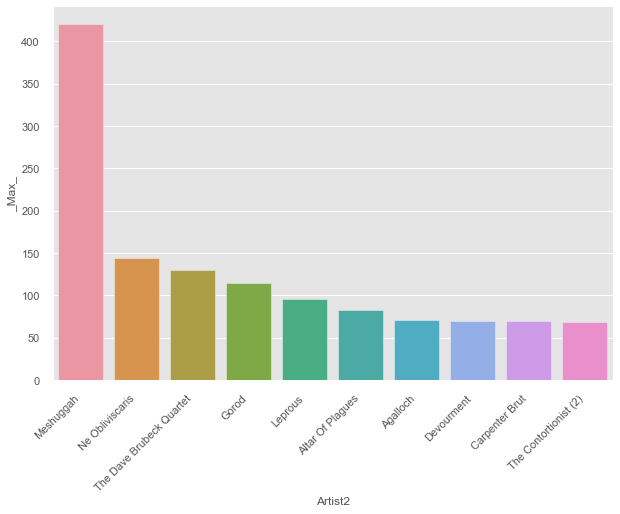

In [173]:
chart = sns.catplot(x="Artist2", y="_Max_", kind="bar", 
                    data=record_mean.sort_values('_Max_',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
record_mean.sort_values('_Max_',ascending=False).head(10)

In [113]:
discogs_df[['Artist2','Title','Collection_Cost','_Min_','_Median_','_Max_']][discogs_df.Artist2 == 'Opeth'].sort_values('_Max_',ascending=False)

Artist2                                              Title  \
54    Opeth           In Live Concert At The Royal Albert Hall   
248   Opeth                            Deliverance & Damnation   
194   Opeth                                          Watershed   
141   Opeth                                           Heritage   
254   Opeth                                      Book Of Opeth   
131   Opeth                                        Morningrise   
32    Opeth                                             Orchid   
238   Opeth                               The Roundhouse Tapes   
33    Opeth                               My Arms, Your Hearse   
273   Opeth       Lamentations Live At Shepherd's Bush Empire    
52    Opeth                                    Blackwater Park   
187   Opeth                                     Pale Communion   
122   Opeth                                     Ghost Reveries   
277   Opeth                                          Sorceress   
82    Opeth                                         Still Life   
21    Opeth  Lamentations - Live At Shepherd's Bush Empire ...   
48    Opeth                               The Roundhouse Tapes   
399   Opeth                                   In Cauda Venenum   
400   Opeth                                   In Cauda Venenum   

     Collection_Cost  _Min_  _Median_   _Max_  
54              66.0  85.99    117.83  141.76  
248             36.0  33.03     58.44  119.99  
194             30.0  25.00     55.00  119.00  
141             40.0  54.95     75.92  100.00  
254             50.0   6.57     59.28   97.80  
131              6.0  26.00     35.00   65.21  
32              22.0  19.47     32.61   43.48  
238             30.0  20.00     26.26   42.50  
33               6.0  20.00     33.33   41.11  
273             30.0  15.05     28.05   39.98  
52              31.0  26.19     31.99   39.98  
187             29.0  18.89     20.55   33.32  
122             40.0  20.00     24.98   32.18  
277             20.0  18.67     24.00   31.00  
82              32.0  20.31     21.18   30.99  
21               6.0   4.99      6.40   19.00  
48               9.0   4.44      9.20   16.67  
399             25.0    NaN       NaN     NaN  
400             25.0    NaN       NaN     NaN

# Label Analysis

In [114]:
label_sum   = discogs_df.groupby(['Label']).agg({
                       'Artist2': 'nunique',
                       'Title': 'count',
                       'Collection_Cost': 'sum',
                       '_Min_': 'sum',
                       '_Median_': 'sum',
                       '_Max_': 'sum'
                        }).reset_index().sort_values(by='_Median_',ascending=False)
label_sum.head()

Label  Artist2  Title  Collection_Cost   _Min_  \
113               Relapse Records       13     23           451.27  374.98   
104  Nuclear Blast, Nuclear Blast        3      4           289.50  427.74   
23                  Century Media       10     17           346.00  275.26   
17                Blood Music (2)        5      9           260.00  268.74   
109            Prosthetic Records        6     13           221.00  164.36   

     _Median_   _Max_  
113    591.73  943.35  
104    579.53  885.80  
23     458.06  650.54  
17     429.77  748.10  
109    271.41  391.61

## Which record labels did I spend the most?

Label  Artist2  Title  Collection_Cost  \
113                          Relapse Records       13     23           451.27   
23                             Century Media       10     17           346.00   
104             Nuclear Blast, Nuclear Blast        3      4           289.50   
17                           Blood Music (2)        5      9           260.00   
41                                   Earache        4      9           230.74   
109                       Prosthetic Records        6     13           221.00   
66                          Indie Recordings        1      5           175.00   
52                              Gilead Media        4      9           172.50   
1                               20 Buck Spin        8     10           169.00   
91   Nordvis Produktion, Bindrune Recordings        3      7           164.00   

      _Min_  _Median_   _Max_  
113  374.98    591.73  943.35  
23   275.26    458.06  650.54  
104  427.74    579.53  885.80  
17   268.74    429.77  748.10  
41   160.17    260.32  319.41  
109  164.36    271.41  391.61  
66   124.12    170.59  269.45  
52   200.85    260.41  300.35  
1    134.06    200.41  267.73  
91   170.63    214.93  296.49

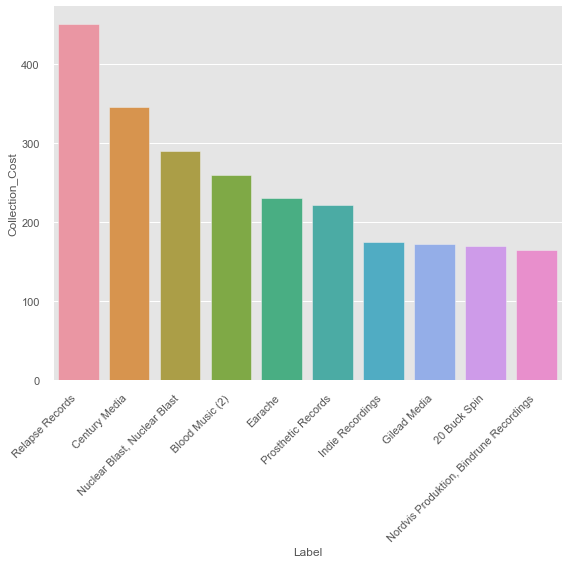

In [174]:
chart = sns.catplot(x="Label", y="Collection_Cost", kind="bar", 
                    data=label_sum.sort_values('Collection_Cost',ascending=False).head(10),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
label_sum.sort_values('Collection_Cost',ascending=False).head(10)

In [116]:
discogs_df.columns

Index(['ID', 'Catalog#', 'Artist', 'Artist2', 'Title', 'Label', 'Format',
       'Released', 'release_id', 'CollectionFolder', 'Date_Added',
       'Collection_Cost', 'Collection_Autographed', '_Min_', '_Median_',
       '_Max_', 'Genre', 'Subgenre', 'Record'],
      dtype='object')

In [117]:
discogs_df.Date_Added = pd.to_datetime(discogs_df.Date_Added).dt.strftime('%m/%Y')
discogs_df.Date_Added.head()

0    07/2019
1    12/2016
2    05/2014
3    04/2017
4    02/2020
Name: Date_Added, dtype: object

### Group data by `Released` and `Date_Added` then get sum by `Collection_Cost`, `_Min_`, `_Median_`, and `_Max_`.

In [118]:
time_df  = discogs_df.groupby(['Released','Date_Added']).agg({
                               'Collection_Cost': 'sum',
                               'Artist': 'nunique',
                               'Artist2': 'nunique',
                               'Title': 'count',
                               '_Min_': 'sum',
                               '_Median_': 'sum',
                               '_Max_': 'sum'
                                }).reset_index().sort_values(by='Date_Added',ascending=True)
time_df.head()

Released Date_Added  Collection_Cost  Artist  Artist2  Title   _Min_  \
60       2012    01/2014            12.00       1        1      1    4.66   
73       2013    01/2014            68.00       4        4      5  106.05   
48       2011    01/2014             8.00       1        1      1    8.86   
92       2014    01/2015            52.00       2        2      2   28.50   
127      2016    01/2016            20.72       1        1      1   16.56   

     _Median_   _Max_  
60      12.05   19.69  
73     161.86  223.85  
48      11.09   15.38  
92      72.73   95.91  
127     23.66   33.00

Plot `Date_Added` over `Collection_Cost`

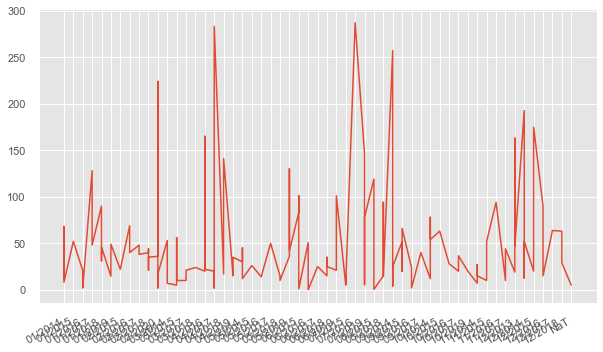

In [195]:
plt.plot(time_df['Date_Added'], time_df['Collection_Cost'])
plt.gcf().autofmt_xdate()
plt.show()

Plot `Date_Added` over `Title`

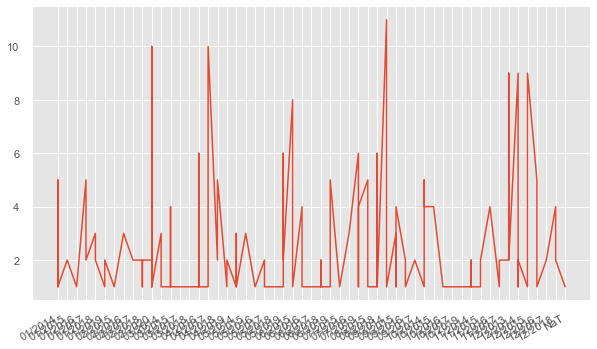

In [196]:
plt.plot(time_df['Date_Added'], time_df['Title'])
plt.gcf().autofmt_xdate()
plt.show()

Plot `Date_Added` over `Artist2`

There were some days that I logged many records at once on discogs.

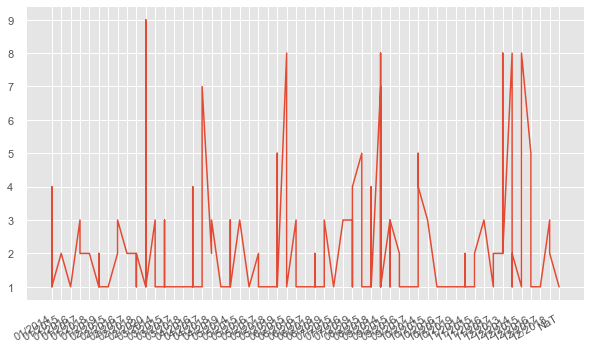

In [197]:
plt.plot(time_df['Date_Added'], time_df['Artist2'])
plt.gcf().autofmt_xdate()
plt.show()

### Group data by `Released`

In [198]:
year_df  = discogs_df.groupby(['Released']).agg({
                               'Artist2': 'count',
                               'Title': 'count',
                               'Collection_Cost': 'sum',
                               '_Min_': 'sum',
                               '_Median_': 'sum',
                               '_Max_': 'sum'
                                }).reset_index().sort_values(by='Released',ascending=True)
year_df.head()

Released  Artist2  Title  Collection_Cost  _Min_  _Median_   _Max_
0      1961        1      1             20.0   5.07     26.50  130.00
1      1971        1      1              5.5   2.25      3.87   10.00
2      1973        2      2             10.5  11.94     23.48   40.00
3      1974        1      1              4.0   1.13      7.00   30.74
4      1975        1      1             12.0  10.00     17.00   25.00

In [199]:
year_df['Released'].describe()

count      32.0000
mean     1998.2500
std        17.5683
min      1961.0000
25%      1979.7500
50%      2004.5000
75%      2012.2500
max      2020.0000
Name: Released, dtype: float64

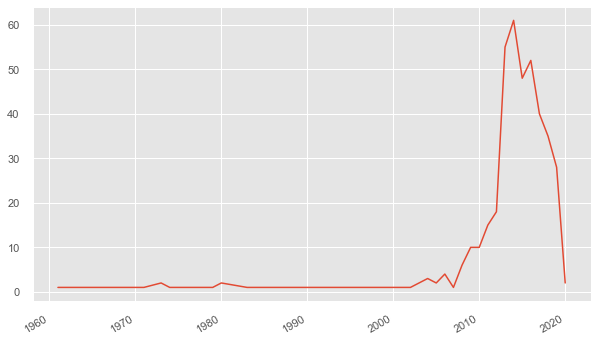

In [200]:
plt.plot(year_df['Released'], year_df['Artist2'])
plt.gcf().autofmt_xdate()
plt.show()

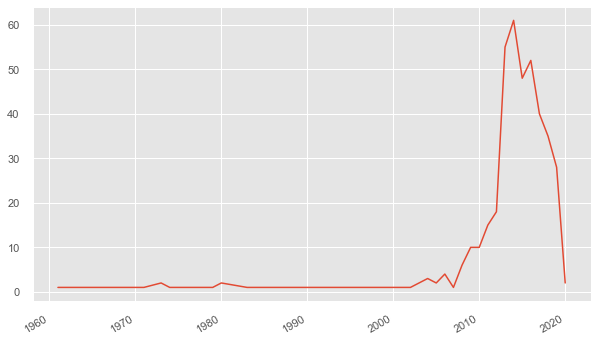

In [201]:
plt.plot(year_df['Released'], year_df['Title'])
plt.gcf().autofmt_xdate()
plt.show()

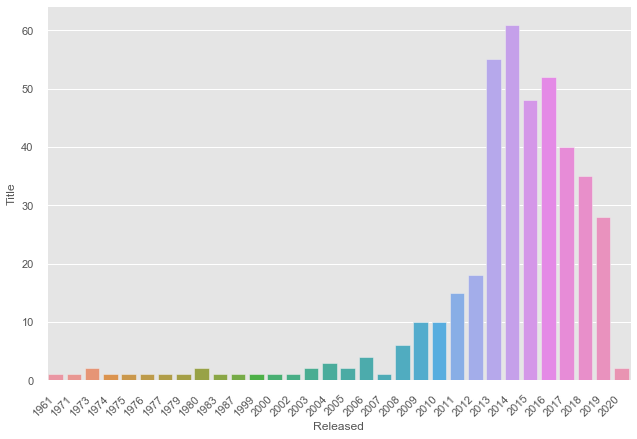

In [184]:
chart = sns.catplot(x="Released", y="Title", kind="bar", 
                    data=year_df.sort_values('Released',ascending=True),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

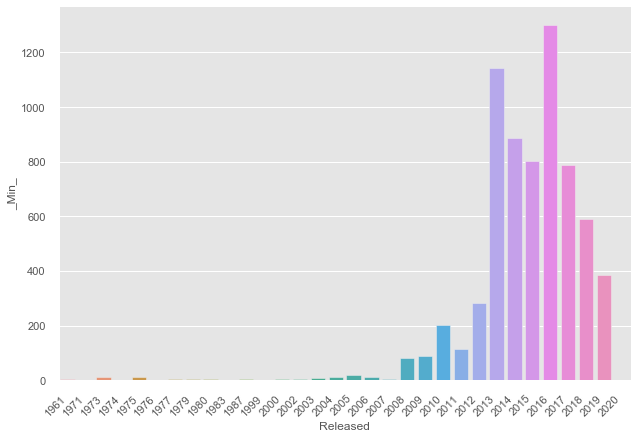

In [185]:
chart = sns.catplot(x="Released", y="_Min_", kind="bar", 
                    data=year_df.sort_values('Released',ascending=True),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

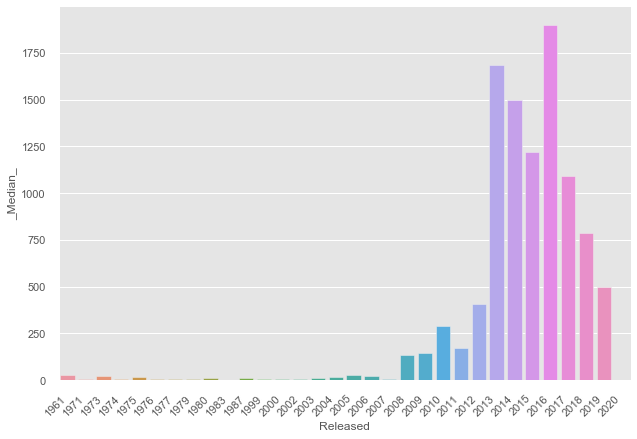

In [186]:
chart = sns.catplot(x="Released", y="_Median_", kind="bar", 
                    data=year_df.sort_values('Released',ascending=True),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

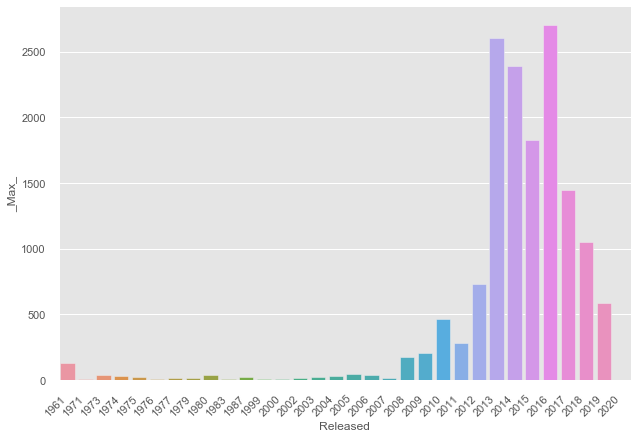

In [187]:
chart = sns.catplot(x="Released", y="_Max_", kind="bar", 
                    data=year_df.sort_values('Released',ascending=True),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

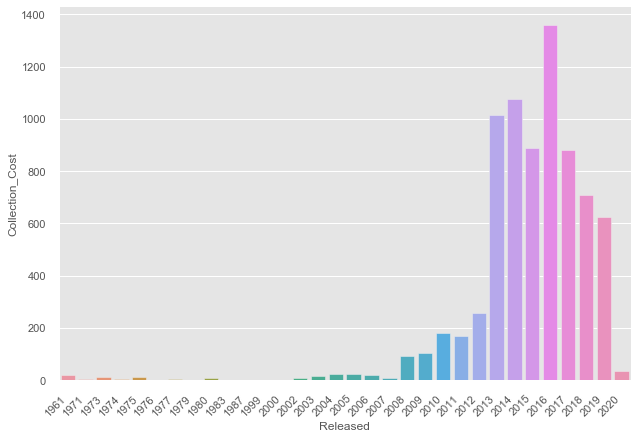

In [188]:
chart = sns.catplot(x="Released", y="Collection_Cost", kind="bar", 
                    data=year_df.sort_values('Released',ascending=True),
                    height=6, aspect=1.5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

In [131]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# bins = np.arange(0, 65, 5)
# g = sns.FacetGrid(discogs_df, col="Format",  row="Collection_Autographed")
# g = g.map(plt.hist, "Collection_Cost", bins=bins, color="r")

In [132]:
# tips = sns.load_dataset("tips")
# g = sns.FacetGrid(tips, col="time",  row="smoker")
# g = g.map(plt.hist, "total_bill")